## LESSON 02: FUNDAMENTALS OF ML AND STATISTICAL LEARNING

In [44]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [75]:
# Define the column names as a list
column_names = ['RANK', 'NAME', 'LANGUAGE', 'TYPE', 'MOST_STREAMED_GAME', '2ND_MOST_STREAMED_GAME',
                'AVERAGE_STREAM_DURATION', 'FOLLOWERS_GAINED_PER_STREAM', 'AVG_VIEWERS_PER_STREAM', 'AVG_GAMES_PER_STREAM', 'TOTAL_TIME_STREAMED',
                'TOTAL_FOLLOWERS', 'TOTAL_VIEWS', 'TOTAL_GAMES_STREAMED', 'ACTIVE_DAYS_PER_WEEK', 'MOST_ACTIVE_DAY', 'DAY_WITH_MOST_FOLLOWERS_GAINED']

### 2. Load Dataset

In [76]:
dataset = pd.read_csv("datasetV2.csv", sep = ",", skipinitialspace=True)
dataset.head()

,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,2ND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
0,1,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,7.6,18405,15852,2.3,4698,10600000,9150000,194,3.6,Friday,Saturday
1,2,jynxzi,English,personality,Tom Clancy's Rainbow Six Siege,NBA 2K20,5.4,3386,1145,1.2,8407,5760000,1950000,54,5.6,Tuesday,Sunday
2,3,caedrel,English,personality,League of Legends,I'm Only Sleeping,6.3,689,12331,1.3,6728,797000,14200000,111,2.8,Thursday,Sunday
3,4,caseoh_,English,personality,NBA 2K23,Just Chatting,4.6,7185,0,3.6,2554,4220000,53,385,6.2,Friday,Monday
4,5,ibai,Spanish,personality,Just Chatting,League of Legends,4.1,8289,190714,1.5,6865,15600000,359000000,149,4.3,Wednesday,Saturday


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  999
#Features =  17


In [14]:
# checking the missing values
dataset[dataset.eq("?").any(axis=1)].head()

,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,2ND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED


In [15]:
# replace data with '?' by NaN
dataset.replace("?", np.nan, inplace=True)
dataset[dataset.isna().any(axis=1)].head()
print("#Samples with missing values = ", len(dataset[dataset.isna().any(axis=1)]))

#Samples with missing values =  77


Filtering missing values

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


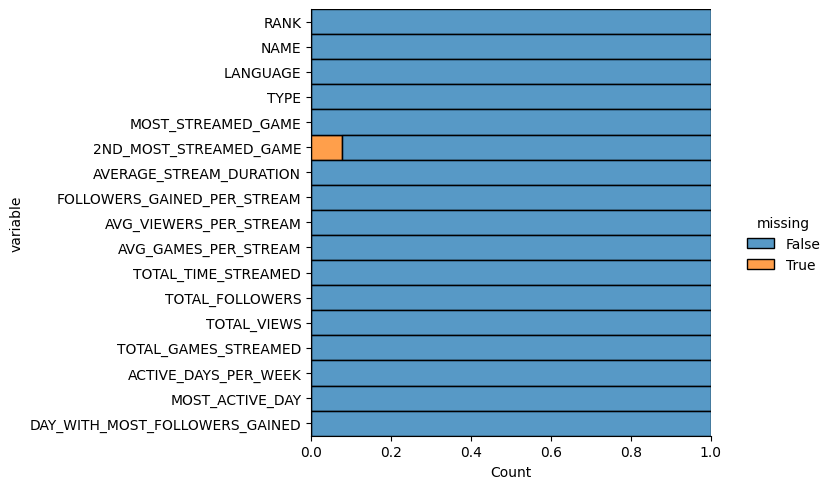

In [46]:
# plot missing data
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)

plt.show()

In [48]:
dataset = dataset.dropna()
print("#Total samples without missing values = ", len(dataset))

#Total samples without missing values =  922


### 3. Descriptive Statistical Analysis

#### Numerical variables

In [19]:
# list of numerical variables
numerical_cols = ["RANK", "AVERAGE_STREAM_DURATION", "FOLLOWERS_GAINED_PER_STREAM", "AVG_VIEWERS_PER_STREAM", "AVG_GAMES_PER_STREAM", "TOTAL_TIME_STREAMED", "TOTAL_FOLLOWERS", "TOTAL_VIEWS", "TOTAL_GAMES_STREAMED", "ACTIVE_DAYS_PER_WEEK"]

Histogram with Frequencies

In [51]:
# function to plot distribution for 1 numerical column
def hist_frequencies(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)
    plt.show()

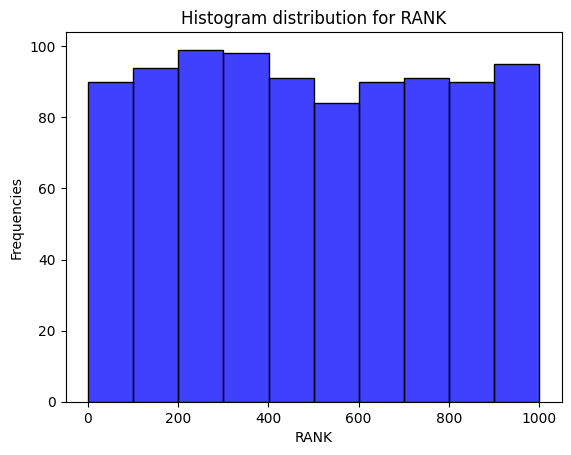

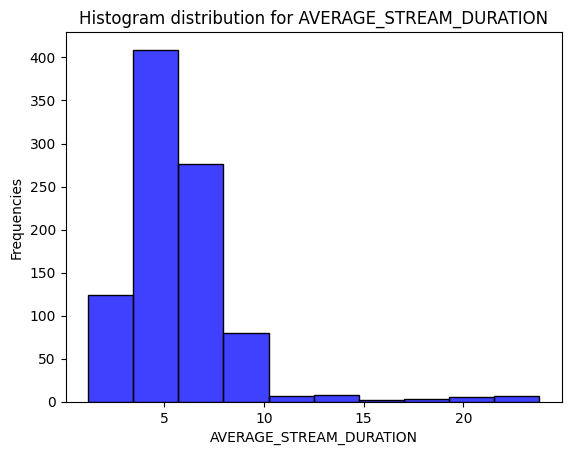

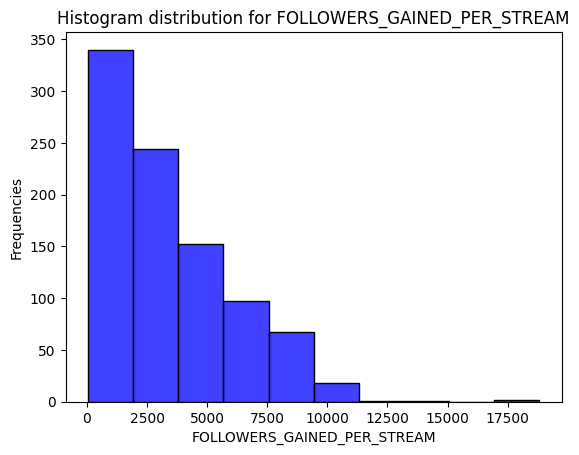

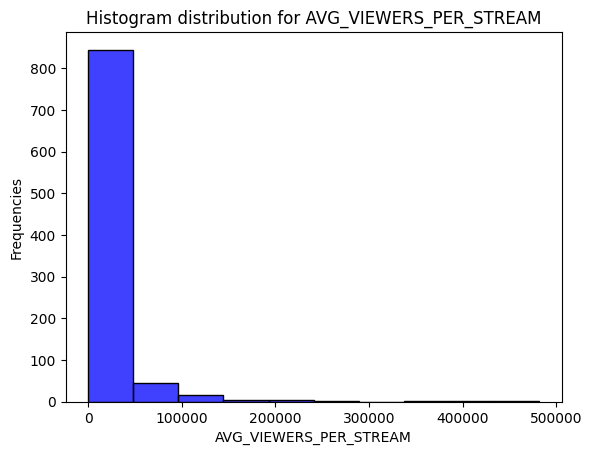

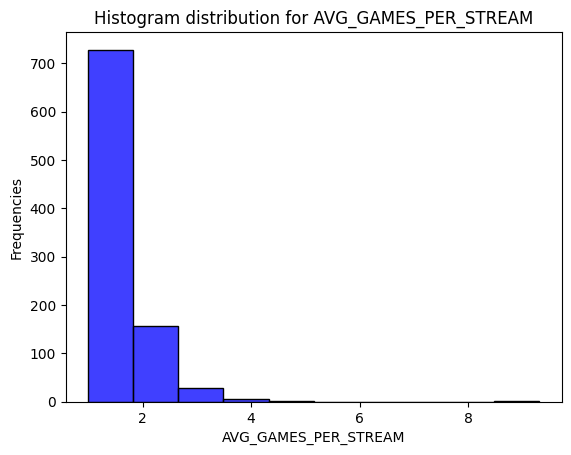

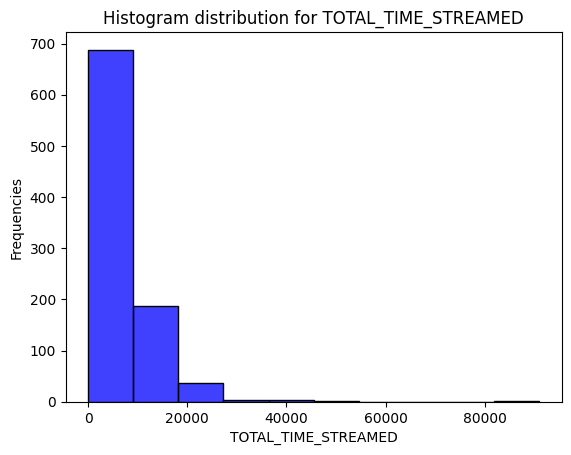

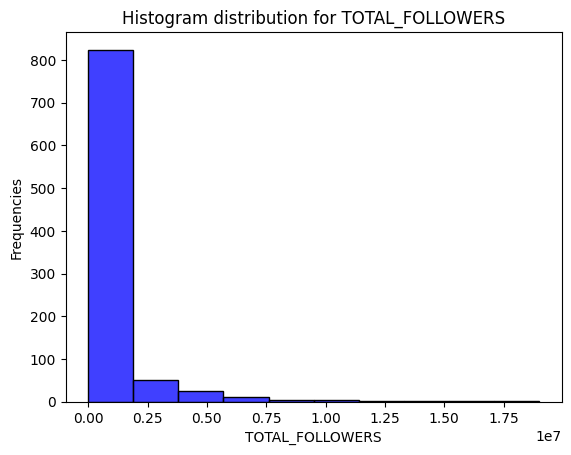

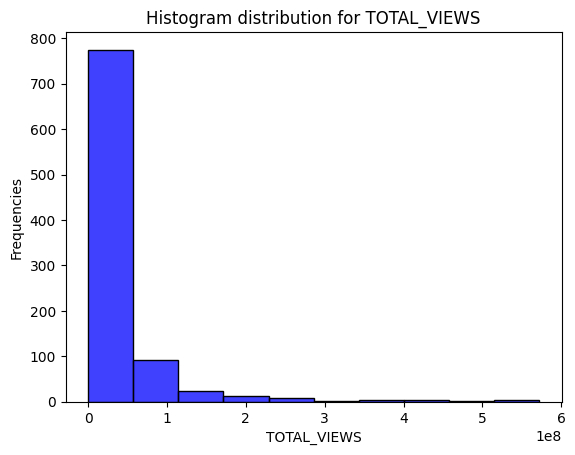

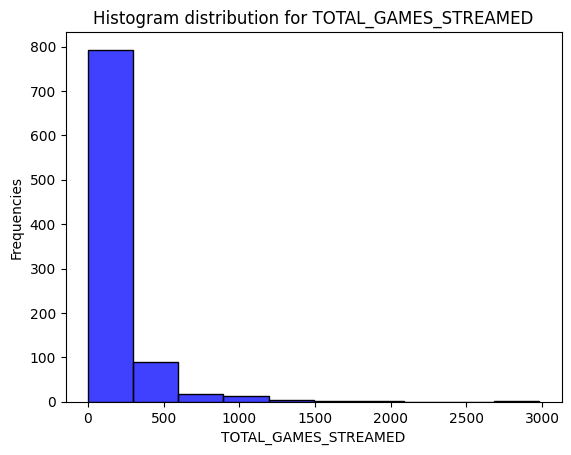

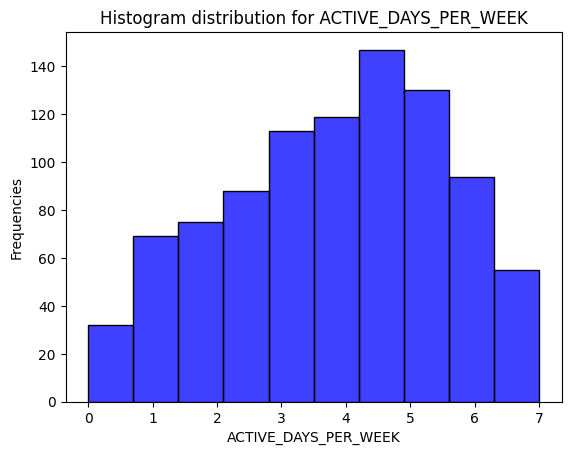

In [52]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_frequencies(dataset, col, 10)

The frequency histogram visually represents the distribution of numeric variables in the dataset. Each line of the histogram shows the number (frequency) of data points that fall within certain ranges of variable values. By observing the shape of the histogram, you can see that the data on the average duration of streams, subscriber growth, average number of viewers, total stream time and other data correspond to a normal distribution.

In [53]:
# function to plot distribution for 1 numerical column
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)
    plt.show()

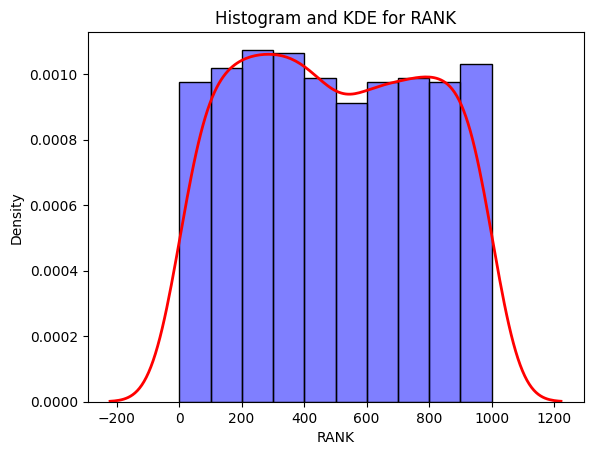

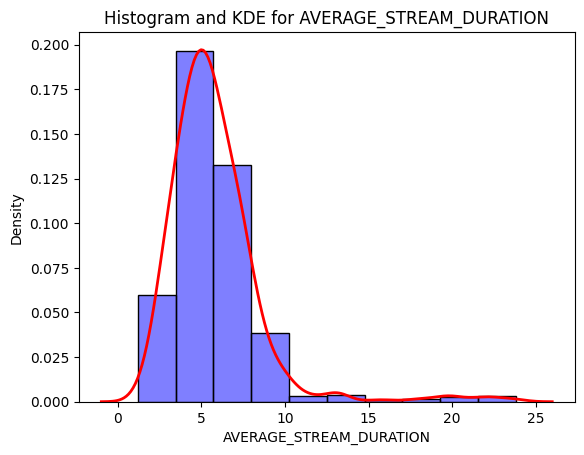

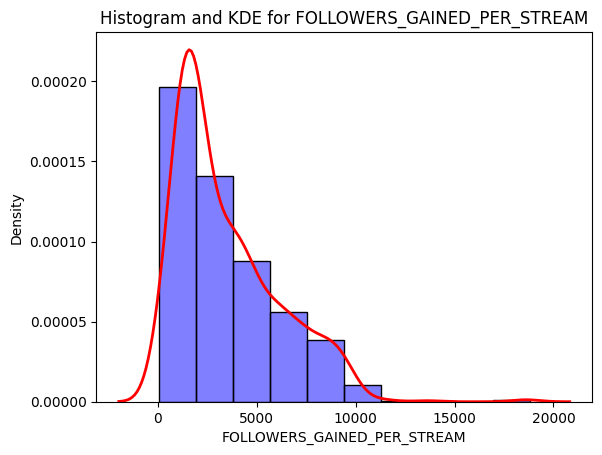

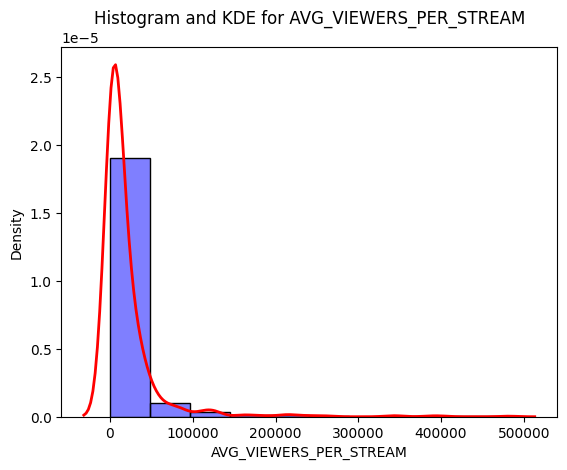

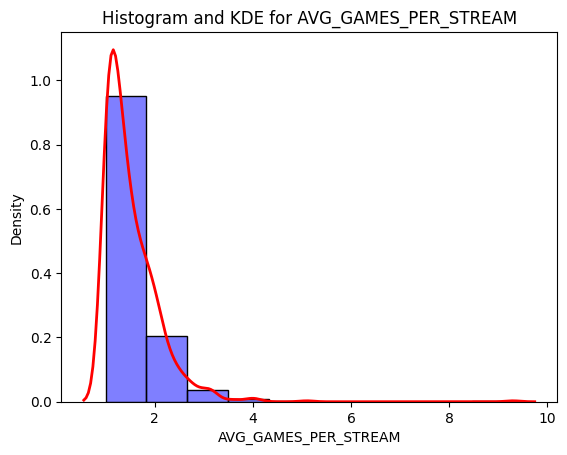

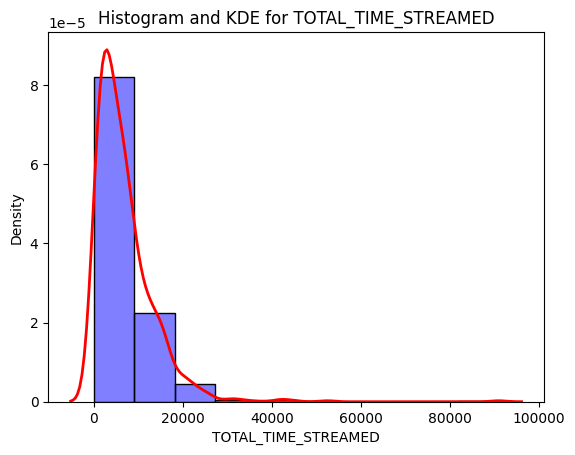

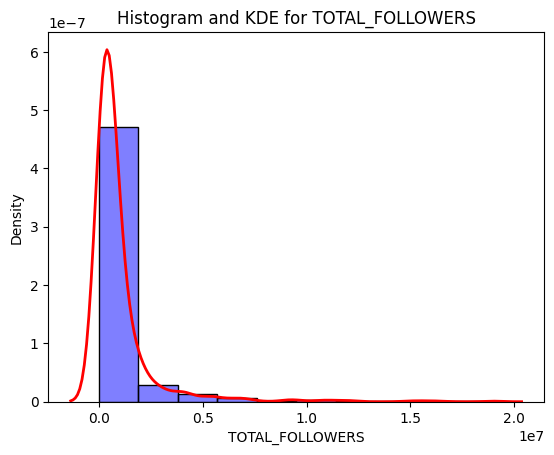

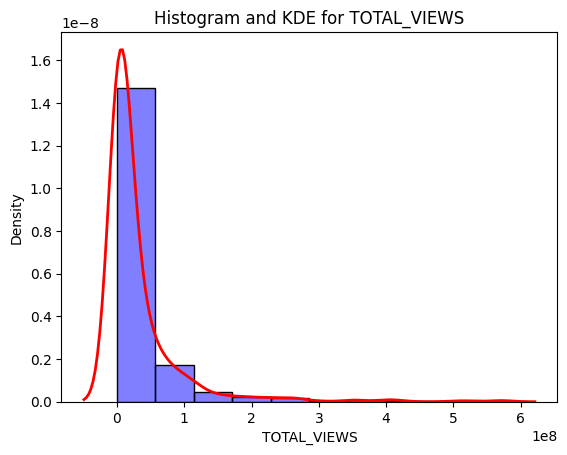

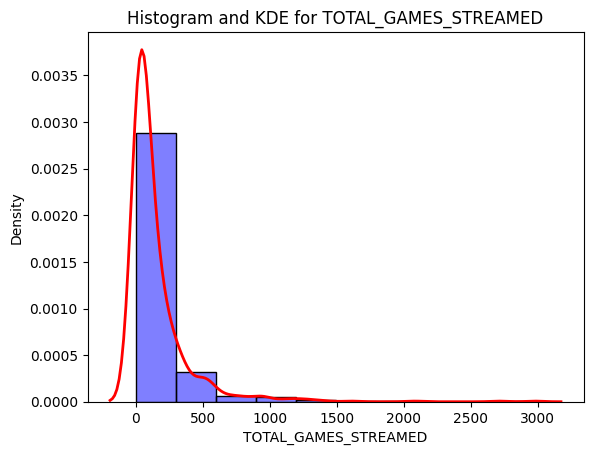

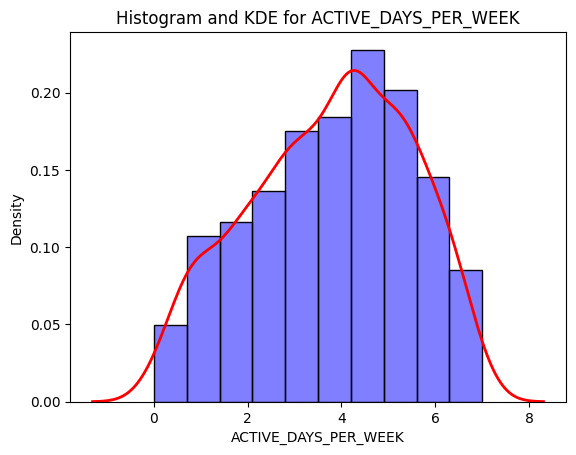

In [54]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_density(dataset, col, 10)

Histogram with a smooth curve that represents the distribution of data points based on estimating the probability density function of a random variable.

Box Plot

In [57]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 2
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

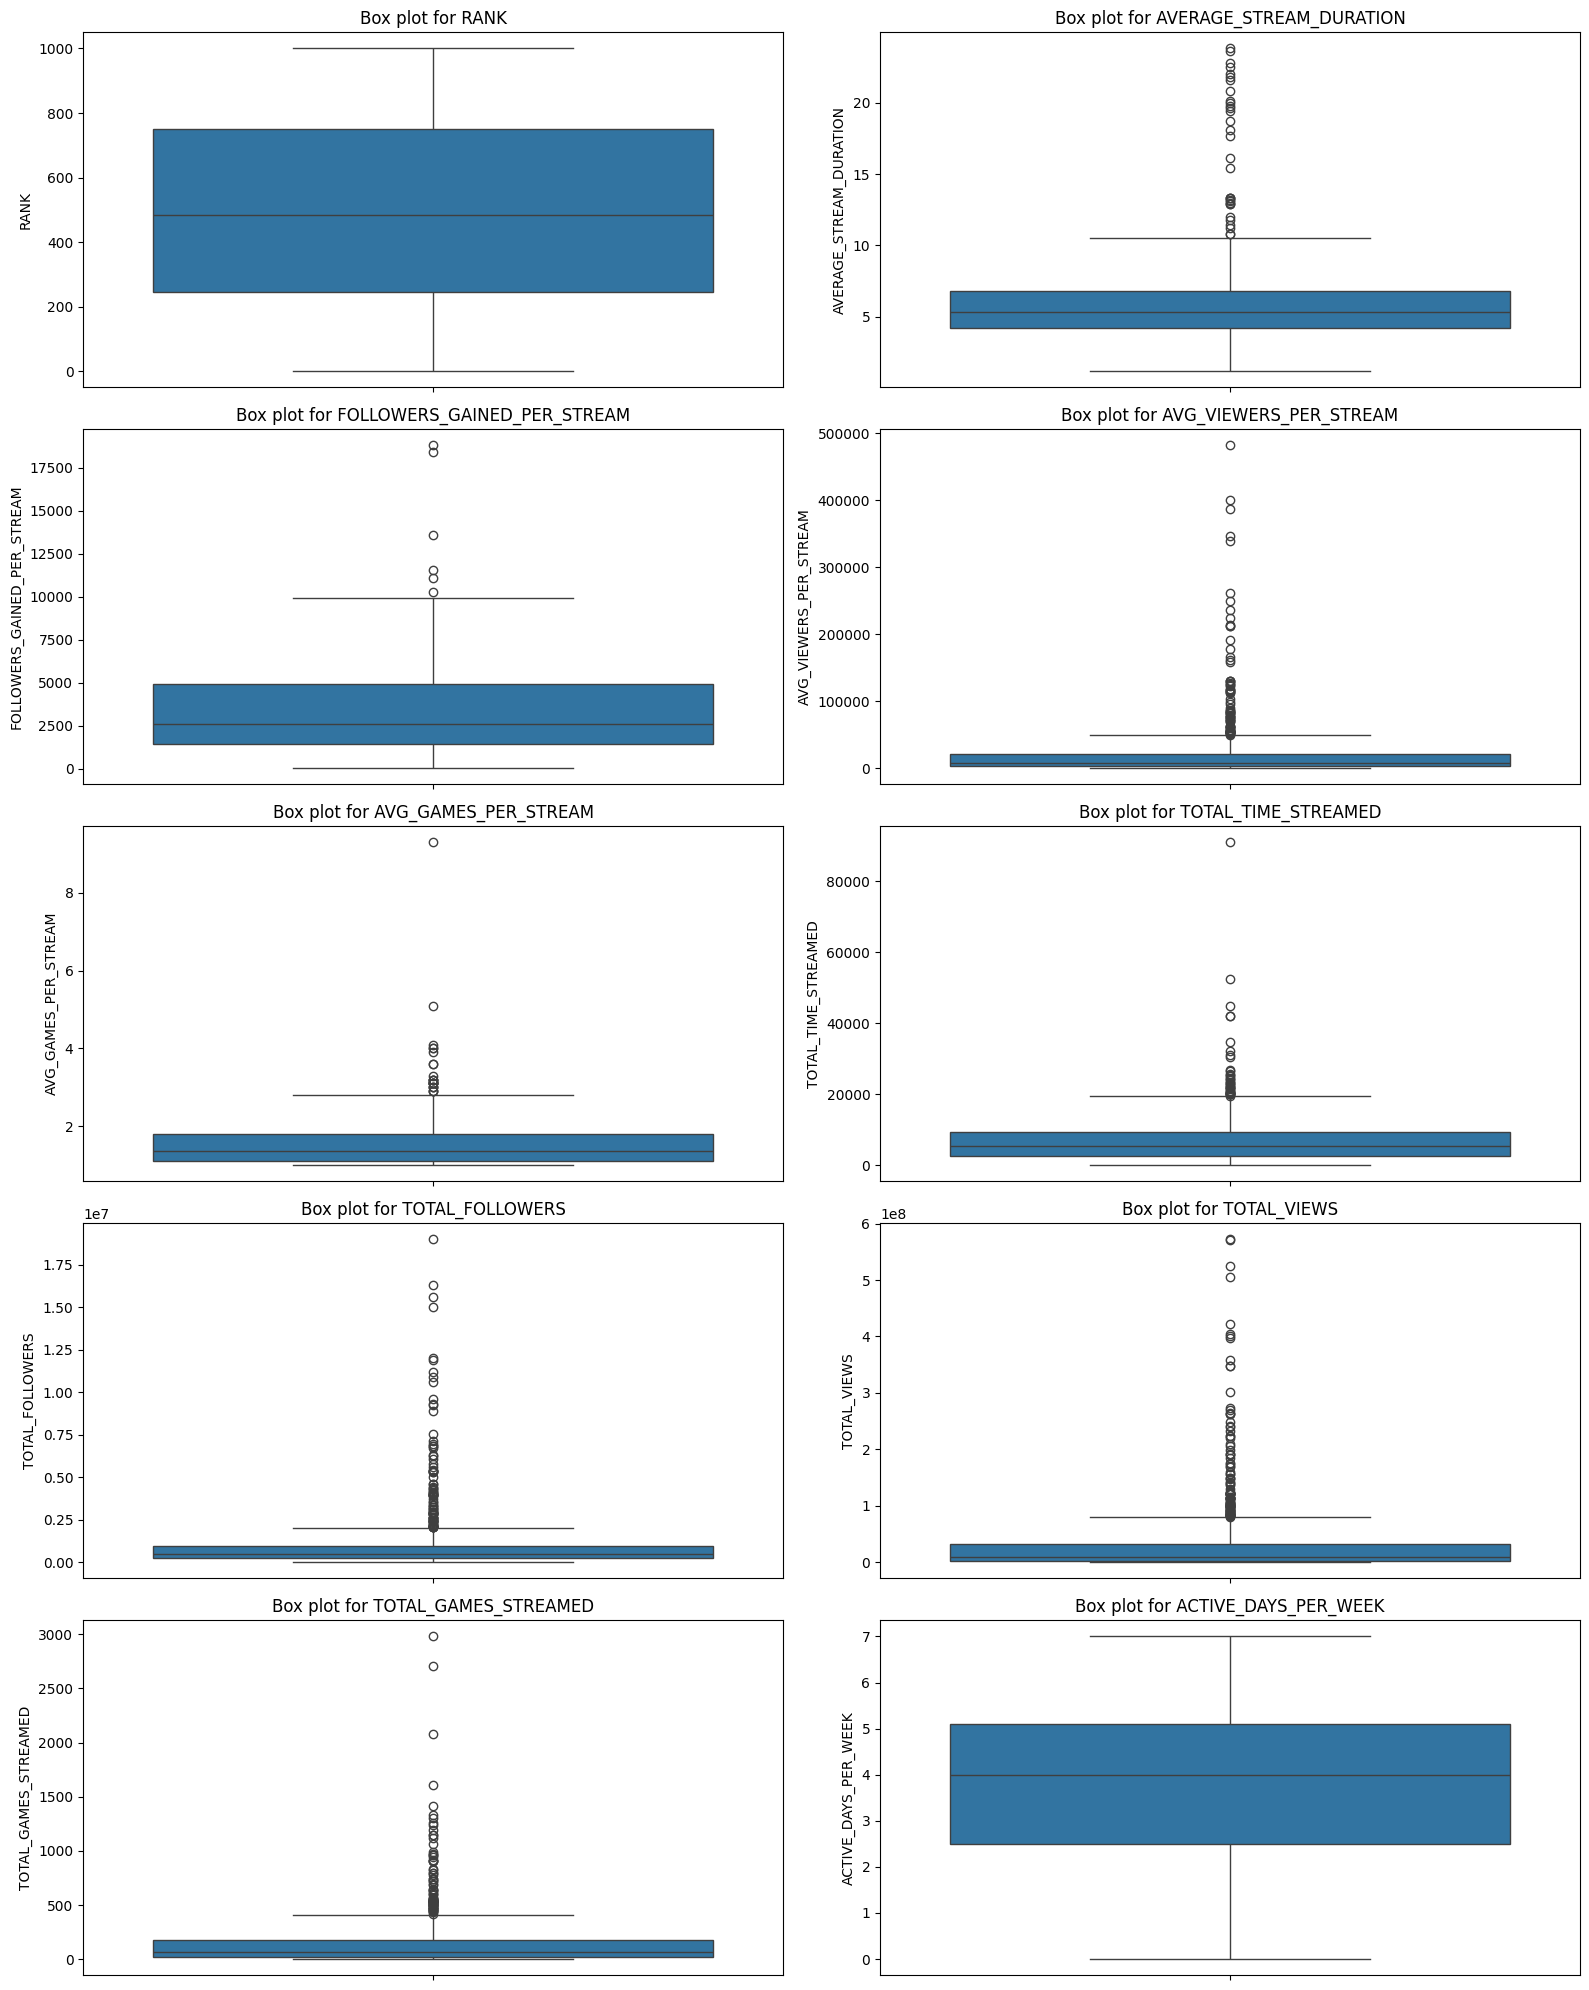

In [58]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

The box plot helps in visualizing the central tendency (median), data spread (IQR), and the presence of outliers in each numerical column.

Statistical metrics

In [ ]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

,RANK,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,9.220000e+02,9.220000e+02,922.000000,922.000000
mean,497.593275,5.777983,3488.736443,19635.072668,1.517787,6917.008677,9.769265e+05,3.151871e+07,153.458785,3.760954
std,289.474271,2.842668,2627.547772,41285.170184,0.581219,6741.961047,1.767902e+06,6.396558e+07,252.477446,1.707102
min,1.000000,1.200000,50.000000,0.000000,1.000000,27.000000,1.200000e+01,0.000000e+00,2.000000,0.000000
25%,247.250000,4.200000,1460.000000,2352.000000,1.100000,2458.500000,2.232500e+05,1.162500e+06,24.000000,2.500000
50%,485.500000,5.300000,2583.000000,6883.500000,1.350000,5287.000000,4.675000e+05,8.345000e+06,66.000000,4.000000
75%,751.750000,6.800000,4947.500000,21300.000000,1.800000,9311.750000,9.485000e+05,3.267500e+07,180.750000,5.100000
max,1000.000000,23.800000,18808.000000,481615.000000,9.300000,90920.000000,1.900000e+07,5.720000e+08,2980.000000,7.000000


Correlation Analysis

In [59]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()
    plt.show()

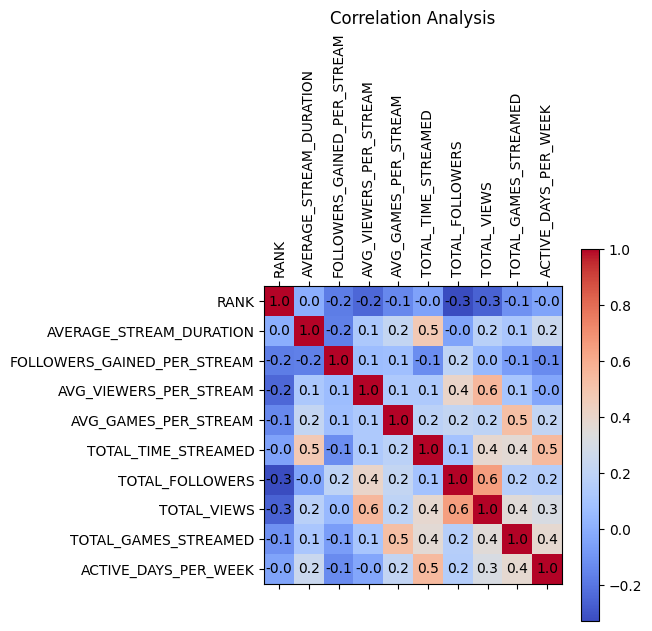

In [ ]:
plot_correlation(dataset, numerical_cols)

The values inside each cell represent the Pearson correlation coefficient, ranging from -1 (strong negative correlation) to +1 (strong positive correlation), with 0 indicating no correlation.

In [61]:
from scipy.stats import norm

# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile


In [ ]:
call_percentile(z = -2)

2.275

In [70]:
from scipy import stats

# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)

    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]

    return outliers

In [71]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in RANK ***
#samples outlier to distribution = 42
%outliers = 4.56 %

*** Outliers detection in AVERAGE_STREAM_DURATION ***
#samples outlier to distribution = 40
%outliers = 4.34 %

*** Outliers detection in FOLLOWERS_GAINED_PER_STREAM ***
#samples outlier to distribution = 42
%outliers = 4.56 %

*** Outliers detection in AVG_VIEWERS_PER_STREAM ***
#samples outlier to distribution = 21
%outliers = 2.28 %

*** Outliers detection in AVG_GAMES_PER_STREAM ***
#samples outlier to distribution = 19
%outliers = 2.06 %

*** Outliers detection in TOTAL_TIME_STREAMED ***
#samples outlier to distribution = 42
%outliers = 4.56 %

*** Outliers detection in TOTAL_FOLLOWERS ***
#samples outlier to distribution = 42
%outliers = 4.56 %

*** Outliers detection in TOTAL_VIEWS ***
#samples outlier to distribution = 21
%outliers = 2.28 %

*** Outliers detection in TOTAL_GAMES_STREAMED ***
#samples outlier to distribution = 21
%outliers = 2.28 %

*** Outliers detection in ACTIVE_DAYS

#### Categorical Variables

In [64]:
# list of categorical variables
categorical_vars = list(set(dataset.columns) - set(numerical_cols))
categorical_vars

['MOST_ACTIVE_DAY',
 'NAME',
 'DAY_WITH_MOST_FOLLOWERS_GAINED',
 'TYPE',
 'MOST_STREAMED_GAME',
 '2ND_MOST_STREAMED_GAME',
 'LANGUAGE']

Count instances for each categorical column

In [65]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** MOST_ACTIVE_DAY ******
MOST_ACTIVE_DAY
Tuesday      167
Wednesday    165
Thursday     136
Sunday       120
Saturday     120
Friday       109
Monday       105
Name: count, dtype: int64

***** NAME ******
NAME
kaicenat        1
cs2_maincast    1
yoshinama222    1
kaysan          1
buxexa_y        1
               ..
im_mittiii      1
missmikkaa      1
des0ut          1
grendy          1
giantwaffle     1
Name: count, Length: 922, dtype: int64

***** DAY_WITH_MOST_FOLLOWERS_GAINED ******
DAY_WITH_MOST_FOLLOWERS_GAINED
Sunday       339
Saturday     148
Monday       128
Tuesday      110
Friday        72
Wednesday     65
Thursday      60
Name: count, dtype: int64

***** TYPE ******
TYPE
personality    876
esports         46
Name: count, dtype: int64

***** MOST_STREAMED_GAME ******
MOST_STREAMED_GAME
Just Chatting         255
League of Legends      82
Grand Theft Auto V     74
VALORANT               60
Fortnite               34
                     ... 
Ashes of Creation       1
Dark 

Bar chart - Analysis of absolute frequencies

In [66]:
# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

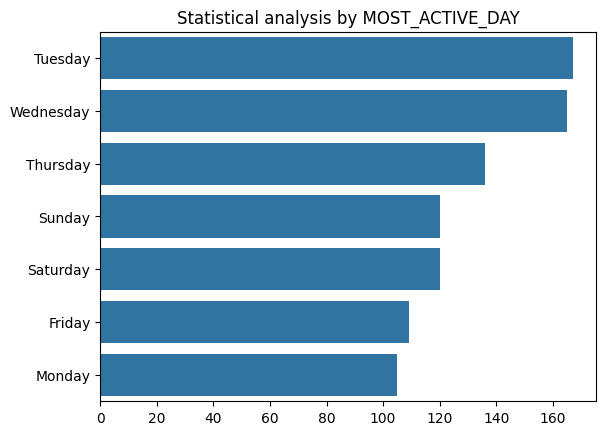

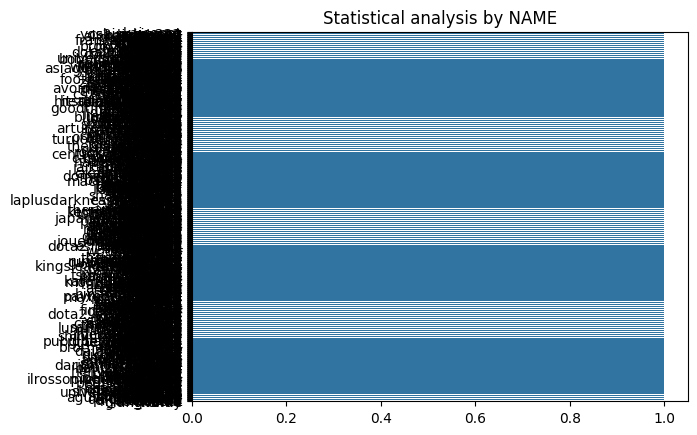

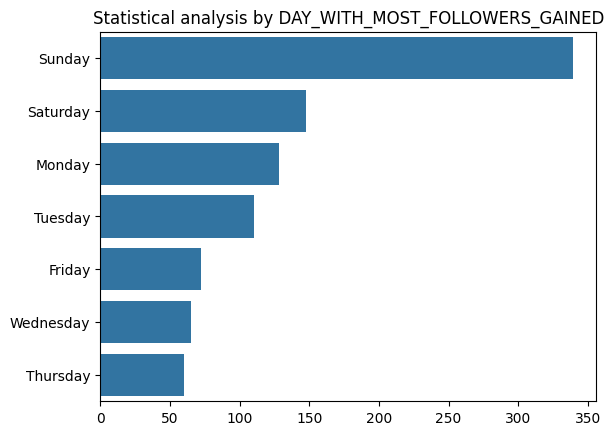

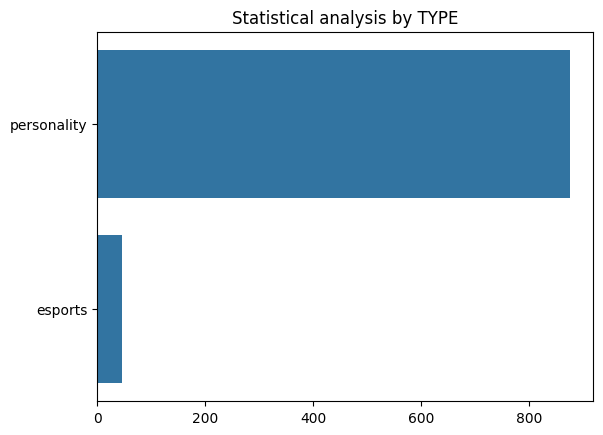

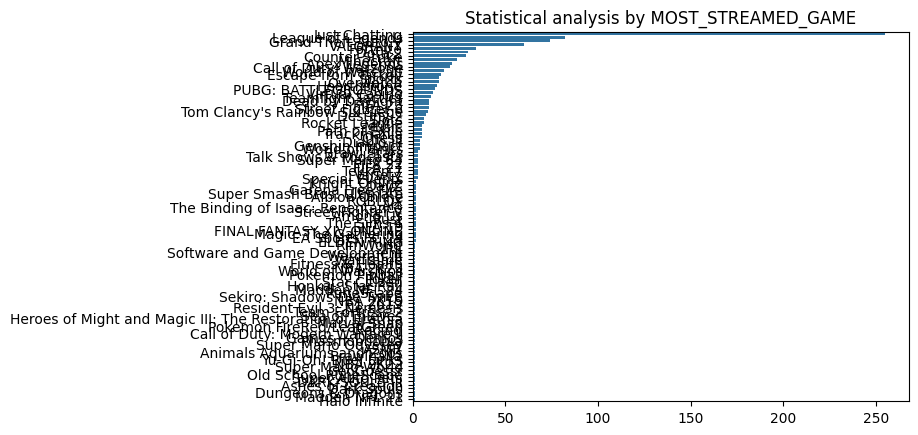

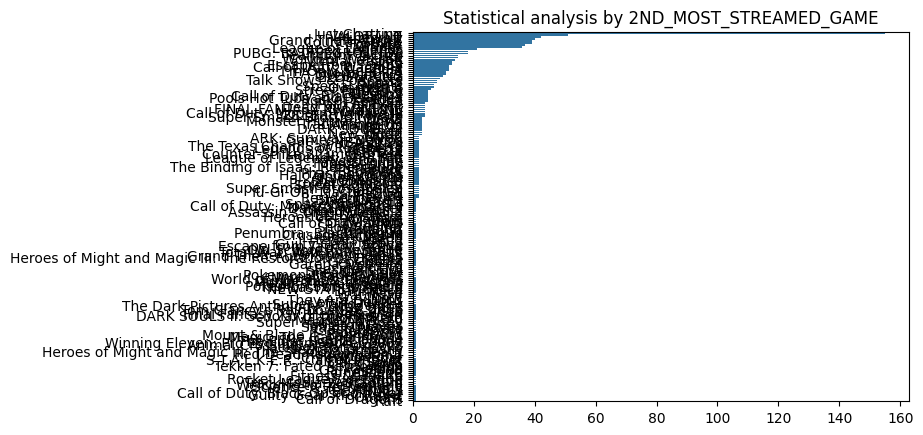

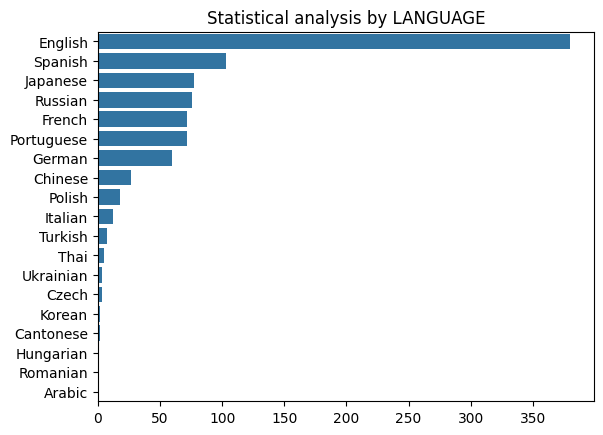

In [67]:
# cycle to plot bar chart for each categorical column
for col in categorical_vars:
    plot_barchart(dataset, col)

This plot helps in visualizing the distribution of categorical data, showing which categories are most or least frequent.

In [72]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

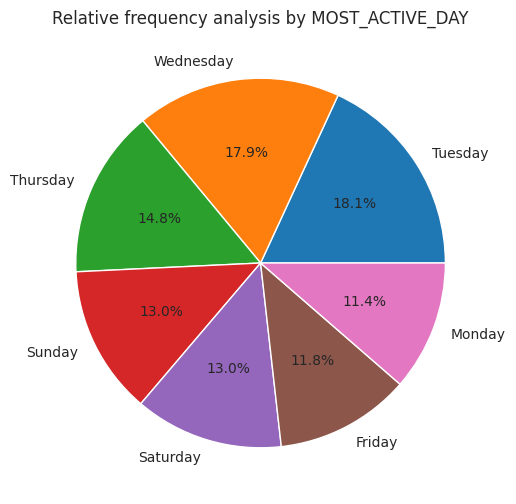

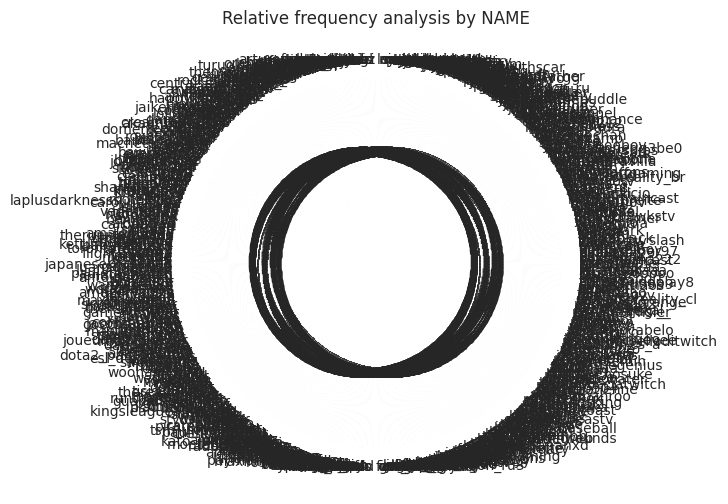

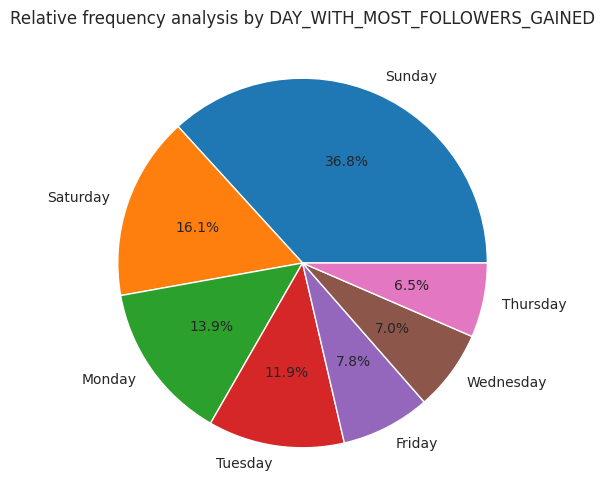

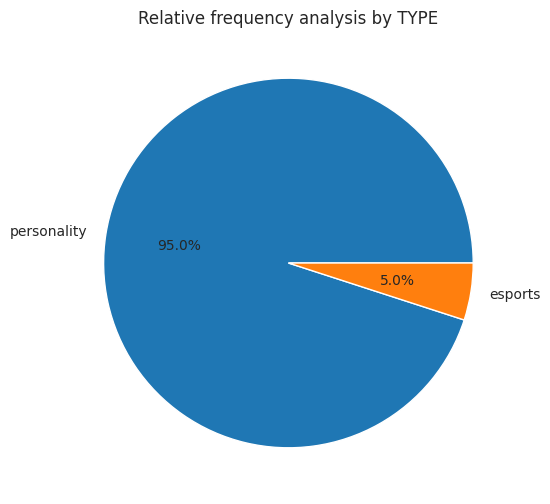

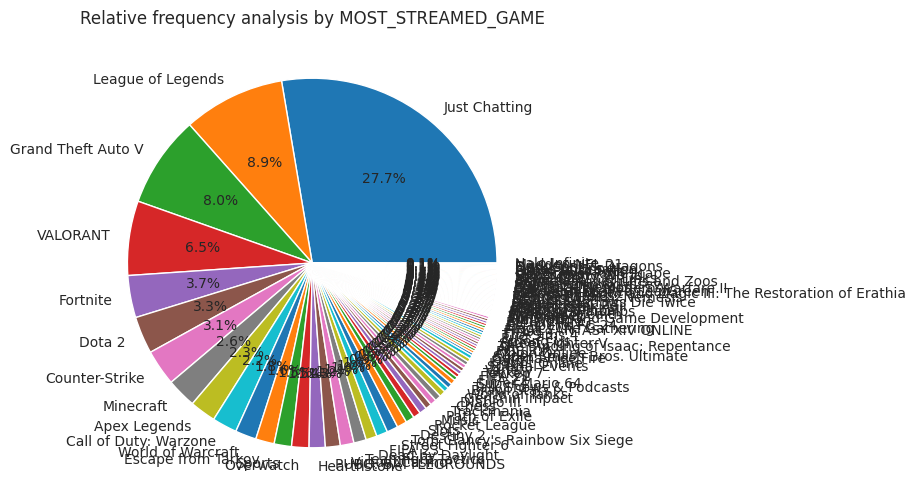

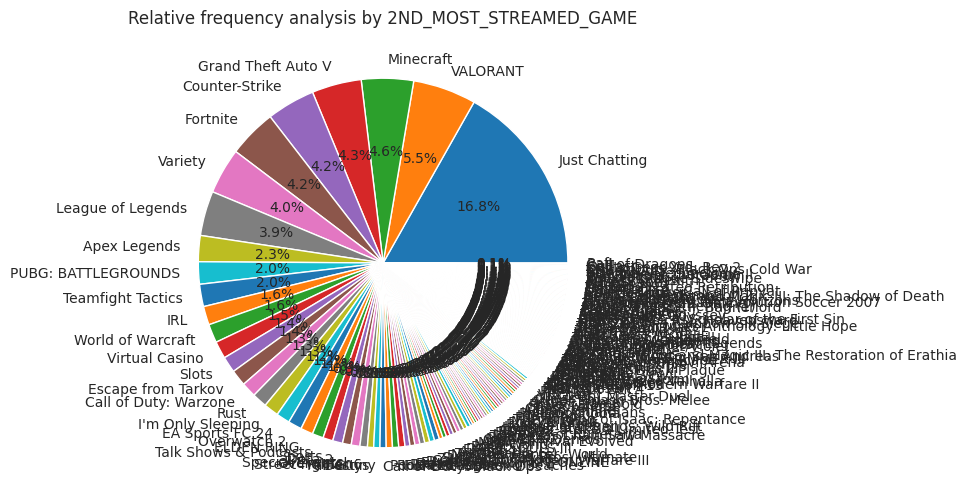

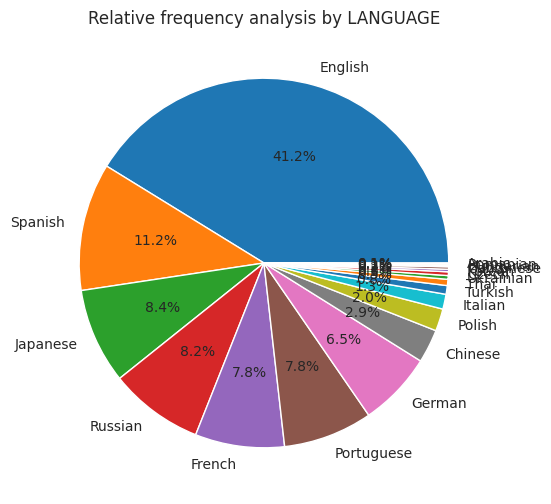

In [73]:
# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

The pie chart helps in understanding the proportion of different categories in the data. But not in our case, bacause we have so many instanses of some categories.

# Descriptive Statistical Analysis for Groups of Categorical Variables

In [90]:

group_by_language_type = dataset.groupby(["LANGUAGE", "TYPE"]).size().reset_index(name = "samples")
print(group_by_language_type)

      LANGUAGE         TYPE  samples
0       Arabic  personality        1
1    Cantonese  personality        2
2      Chinese      esports        1
3      Chinese  personality       27
4        Czech  personality        3
5      English      esports       37
6      English  personality      364
7       French      esports        7
8       French  personality       65
9       German  personality       60
10   Hungarian  personality        1
11     Italian  personality       13
12    Japanese      esports        3
13    Japanese  personality       76
14      Korean  personality        2
15      Polish  personality       18
16  Portuguese      esports        4
17  Portuguese  personality       78
18    Romanian  personality        1
19     Russian  personality      115
20     Spanish      esports        5
21     Spanish  personality      101
22        Thai  personality        5
23     Turkish  personality        7
24   Ukrainian  personality        3


In [91]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('LANGUAGE')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by LANGUAGE and TYPE')
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


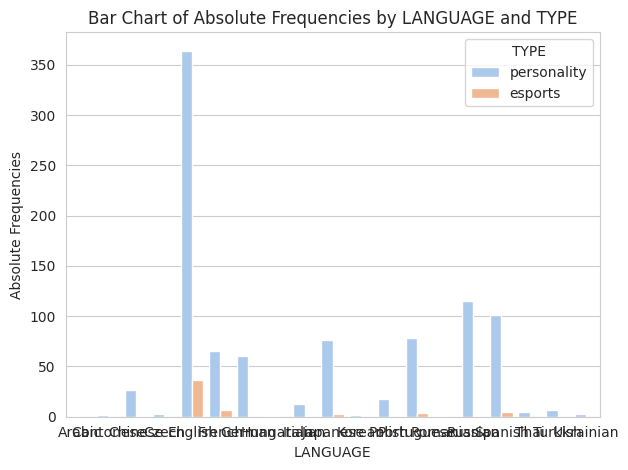

In [92]:
plot_absfreq_groups(group_by_language_type, "LANGUAGE", "TYPE")

This graph shows the number of streamers speaking a particular language

In [94]:
# function to plot relative frequencies for groups
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " " + group[g2]
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by Language and Type')
    plt.show()

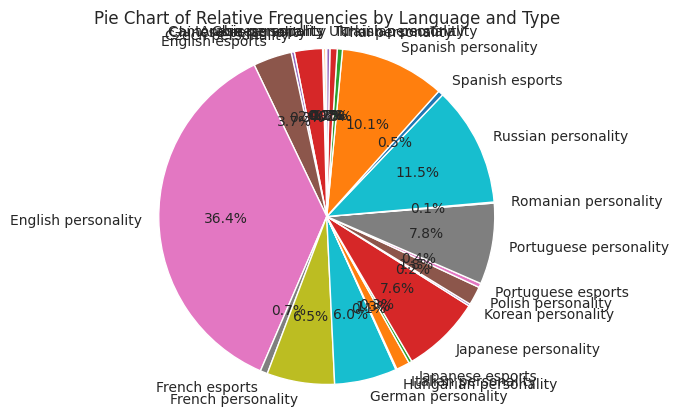

In [95]:
plot_relfreq_groups(group_by_language_type, "LANGUAGE", "TYPE")

This chart shows the relative distribution of streamers by different languages and types (for example, what percentage of streamers stream in English as professionals or in Spanish as amateurs).